# Concatenate two datasets

In [2]:
import numpy as np
import pandas as pd
import pylab
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib notebook

In [3]:
with open('dados2/dados2.dat', 'r') as infile:
    readlines = infile.readlines()
    
    df = []
    df2 = []

    for line in readlines: 
        temp = line.split('   ')
        for elem in temp:
            if elem == '':
                temp.remove(elem)
                continue
            temp[temp.index(elem)] = float(elem.strip())
        df.append([temp[0], float(temp[1]), temp[2], 
                   temp[3], temp[4], temp[5], temp[6], temp[7]])
        df2.append([temp[0], float(temp[1]), temp[2], 
                   temp[3], temp[4], temp[5], temp[6], temp[7]]) 

with open('dados1/dados.dat', 'r') as infile:
    readlines = infile.readlines()

    for line in readlines: 
        temp = line.split('   ')
        for elem in temp:
            if elem == '':
                temp.remove(elem)
                continue
            temp[temp.index(elem)] = float(elem.strip())
        df.append([temp[0], float(temp[1]), temp[2], 
                   temp[3], temp[4], temp[5], temp[6], temp[7]])
            
df = pd.DataFrame(df)
df2 = pd.DataFrame(df2)

In [8]:
df

,0,1,2,3,4,5,6,7
0,-27.403900,34.909000,0.950377,3.307300,34.4068,18.61440,45.17680,4.340000
1,1.017860,2.930730,19.793900,29.140500,71.2174,9.20533,7.38931,0.030000
2,0.657983,4.936150,14.504800,20.598800,117.9200,16.85310,11.44240,0.070000
3,-9.000650,10.952400,18.637400,24.973700,108.0280,19.79630,23.60180,3.070000
4,-21.196100,33.012100,0.457121,21.014900,21.7571,3.92138,14.18610,0.929999
...,...,...,...,...,...,...,...,...
1973,1.779430,0.027883,0.880700,0.162503,17.6668,2.34437,21.23360,0.100000
1974,1.059680,0.529239,0.351788,1.023610,48.8019,1.52108,29.33990,32.860500
1975,0.699809,0.779917,0.087332,0.454162,14.3694,2.85944,33.39300,4.000000
1976,3.980060,1.281270,0.558420,1.315270,45.5045,2.03614,41.49920,42.518900


In [5]:
# data 2
nDF = StandardScaler().fit_transform(df2)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(nDF)

principalDf = pd.DataFrame(data=principal_components, 
                           columns = ['principal component 1', 'principal component 2'])
kmeans = KMeans(n_clusters=2)
y = kmeans.fit_predict(principalDf[['principal component 1', 'principal component 2']])
principalDf['Cluster'] = y
first_regime_idx = principalDf.index[principalDf['Cluster']==0]
second_regime_idx = principalDf.index[principalDf['Cluster']==1]

In [6]:
nDF = StandardScaler().fit_transform(df)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(nDF)

principalDf = pd.DataFrame(data=principal_components, 
                           columns = ['principal component 1', 'principal component 2'])

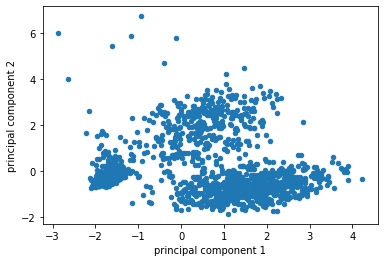

In [7]:
principalDf.plot(x='principal component 1', y='principal component 2', kind='scatter')

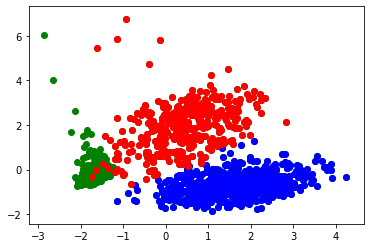

In [15]:
pylab.plot(principalDf['principal component 1'], principalDf['principal component 2'], 'go',zorder=0)
pylab.scatter([principalDf['principal component 1'].values[i] for i in range(1979) if i in first_regime_idx],
             [principalDf['principal component 2'].values[i] for i in range(1979) if i in first_regime_idx], c='b',zorder=5)
pylab.scatter([principalDf['principal component 1'].values[i] for i in range(1979) if i in second_regime_idx],
             [principalDf['principal component 2'].values[i] for i in range(1979) if i in second_regime_idx], c='r',zorder=10)

## Simulation exercise:
<br>
In dados2/data_analysis we concluded closest point to first regime centroid is row 723, and closest point to second regime centroid is row 393
<br>
To study First Regime:
    - Vary Column 1, fixate all others around 723 coordinates.
    - Vary Column 5, fixate all others around 723 coordinates.
    - Vary Column 2, fixate all others aorund 723 coordinates.
To study Second Regime:
    - Vary Column 4, fixate all others around 393 coordinates.
    - Vary Column 3, fixate all others around 393 coordinates.
    - Vary Column 2, fixate all others aorund 393 coordinates. 